In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

############################ config connection to graph database #############################

user_name = 'neo4j'
password = '1234'
bolt_url = 'bolt://localhost:7687'
ip_address = 'localhost'
http_port = '7474'
http_url = 'http://{0}:{1}@{2}:{3}/db/data'.format(user_name, password, ip_address, http_port)

#######============Not Working in version 4.0===============#################################
###############################################################################################


from py2neo import *
from py2neo.ogm import *
graph = Graph(bolt_url,auth=(user_name,password)) 

In [2]:
# Load csv files into python dataframe 
product = pd.read_csv("northwind/products.csv")
category = pd.read_csv("northwind/categories.csv")
customers = pd.read_csv("northwind/customers.csv")
employees = pd.read_csv("northwind/employees.csv")
orders = pd.read_csv("northwind/orders.csv")
suppliers = pd.read_csv("northwind/suppliers.csv")

In [3]:
product.head()

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [4]:
category

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",\x
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",\x
2,3,Confections,"Desserts, candies, and sweet breads",\x
3,4,Dairy Products,Cheeses,\x
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",\x
5,6,Meat/Poultry,Prepared meats,\x
6,7,Produce,Dried fruit and bean curd,\x
7,8,Seafood,Seaweed and fish,\x


In [5]:
customers.head()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [6]:
employees.head()

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,\x,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,\x,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,\x,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,\x,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,\x,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [7]:
orders.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,OrderID.1,ProductID,UnitPrice,Quantity,Discount
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,10248,11,14.0,12,0.0
1,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,10248,42,9.8,10,0.0
2,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,10248,72,34.8,5,0.0
3,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany,10249,14,18.6,9,0.0
4,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany,10249,51,42.4,40,0.0


In [8]:
suppliers.head()

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,NaN,EC1 4SD,UK,(171) 555-2222,NaN,NaN
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,NaN,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,NaN
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,NaN,100,Japan,(03) 3555-5011,NaN,NaN
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         2155 non-null   int64  
 1   CustomerID      2155 non-null   object 
 2   EmployeeID      2155 non-null   int64  
 3   OrderDate       2155 non-null   object 
 4   RequiredDate    2155 non-null   object 
 5   ShippedDate     2082 non-null   object 
 6   ShipVia         2155 non-null   int64  
 7   Freight         2155 non-null   float64
 8   ShipName        2155 non-null   object 
 9   ShipAddress     2155 non-null   object 
 10  ShipCity        2155 non-null   object 
 11  ShipRegion      856 non-null    object 
 12  ShipPostalCode  2100 non-null   object 
 13  ShipCountry     2155 non-null   object 
 14  OrderID.1       2155 non-null   int64  
 15  ProductID       2155 non-null   int64  
 16  UnitPrice       2155 non-null   float64
 17  Quantity        2155 non-null   i

### Building Graph

In [10]:
constraints = graph.run('''call db.constraints''').to_data_frame().values

In [11]:
# To Ensure each order is not duplicated, we create constraint on Order. 
# Note that creating constrains automatically also creates indexes on nodes

if len(constraints) == 0:
    graph.run('''CREATE CONSTRAINT order_id ON (o:Order) ASSERT o.orderID IS UNIQUE; ''')
    graph.run('''CREATE CONSTRAINT product_id ON (p:Product) ASSERT p.productID IS UNIQUE ''')
    graph.run('''CREATE CONSTRAINT product_name ON (p:Product) ASSERT p.productName IS UNIQUE ''')
    graph.run('''CREATE CONSTRAINT employee_id ON (e:Employee) ASSERT e.employeeID IS UNIQUE ''')
    graph.run('''CREATE CONSTRAINT supplier_id ON (s:Supplier) ASSERT s.supplierID IS UNIQUE ''')
    graph.run('''CREATE CONSTRAINT category_id ON (c:Category) ASSERT c.categoryID IS UNIQUE ''')

#### Create Nodes

In [12]:
graph.delete_all()

#Create nodes for Table Order
for index, row in orders.iterrows():

    OrderID = int(row['OrderID'])
    shipname= row['ShipName']
    EmployeeID= int(row['EmployeeID'])
    ProductID = int(row['ProductID'])
    UnitPrice = float(row['UnitPrice'])
    Quantity = float(row['Quantity']) 
    

    
    Order_node = Node('Order', id = OrderID)
    Order_node['orderID'] = OrderID
    Order_node['shipname'] = shipname

    
    unique_id = str(row['OrderID'])+ "_" + str(row['EmployeeID']) + "_" + str(row['ProductID'])
    
    o_tempnode = Node('o_temp', id = unique_id)

    o_tempnode['orderID'] = OrderID
    o_tempnode['productID'] = ProductID
    o_tempnode['employeeID'] = EmployeeID
    o_tempnode['unitPrice'] = UnitPrice
    o_tempnode['quantity'] = Quantity

    
    #create node  on graphDB
    
    graph.merge(Order_node, 'Order', 'id')
    graph.merge(o_tempnode, 'o_temp', 'id')
 
    graph.merge(Relationship(Order_node, "ConnectedTo",o_tempnode ))


In [13]:
# Create nodes for table Products:

for index, row in product.iterrows():

    ProductID = int(row['ProductID'])
    productName= row['ProductName']
    unitPrice= float(row['UnitPrice'])
    SupplierID = int(row['SupplierID'])
    CategoryID = int(row['CategoryID'])
    
    Product_node = Node('Product', id = ProductID) 
    Product_node['productID'] = ProductID
    Product_node['productName'] = productName
    Product_node['unitPrice'] = unitPrice

    
    unique_id = str(row['ProductID']) + "_" + str(row['SupplierID']) + "_" + str(row['CategoryID']) 
    
    p_tempnode = Node("p_temp", id = unique_id)    
    p_tempnode['productID'] = ProductID
    p_tempnode['productName'] = productName
    p_tempnode['supplierID'] = SupplierID
    p_tempnode['unitPrice'] = unitPrice
    p_tempnode['categoryID'] = CategoryID
    
    #create node  on graphDB
    
    graph.merge(Product_node, 'Product', 'id')
    graph.merge(p_tempnode, 'p_temp', 'id')
    
    graph.merge(Relationship( Product_node, "ConnectedTo",p_tempnode ))
    graph.merge(Relationship( p_tempnode, "Connection_2",Product_node ))
 

In [14]:
# Create nodes for table Suppliers:

for index, row in suppliers.iterrows():

    SupplierID = int(row['SupplierID'])
    CompanyName= row['CompanyName']
    
    Supplier_node = Node('Supplier', id = SupplierID) 
    Supplier_node['supplierID'] = SupplierID
    Supplier_node['CompanyName'] = CompanyName
    
    #create node on graphDB
    
    graph.merge(Supplier_node, 'Supplier', 'id')
 

In [15]:
# Create nodes for table Employees:


for index, row in employees.iterrows():

    EmployeeID = int(row['EmployeeID'])
    FirstName= row['FirstName']
    LastName = row['LastName']
    Title = row['Title']
    ReportsTo = row['ReportsTo']
   
    Employee_node = Node('Employee', id = EmployeeID)   
    
    Employee_node['employeeID'] = EmployeeID
    Employee_node['FirstName'] = FirstName
    Employee_node['LastName'] = LastName
    Employee_node['Title'] = Title
    Employee_node['ReportsTo'] = ReportsTo

    #create node on graphDB
    
    graph.merge(Employee_node, 'Employee', 'id')
 

In [16]:
# Categories
for index, row in category.iterrows():

    CategoryID = int(row['CategoryID'])
    CategoryName= row['CategoryName']
    Description = row['Description']
   
    Category_node = Node('Category', id = CategoryID)   
    
    Category_node['categoryID'] = CategoryID
    Category_node['CategoryName'] = CategoryName
    Category_node['Description'] = Description

    #create node on graphDB
    
    graph.merge(Category_node, 'Category', 'id')
 

#### Create relationships between different nodes

In [17]:

#  Orders and  Products

graph.run('''
MATCH (o:o_temp), (p:p_temp)
where o.productID = p.productID
MERGE (o)-[op:CONTAINSTEMP]->(p)
  ON CREATE SET op.unitPrice = toFloat(o.UnitPrice), op.quantity = toFloat(o.Quantity);
''')

graph.run(''' MATCH  path = (o:Order)-[*]->(p:Product)
merge (o)-[:CONTAINS]-(p) 
''')





In [18]:

#  Orders and Employees
graph.run(''' 
MATCH (o:o_temp), (e: Employee)
where o.employeeID = e.employeeID
MERGE (o)-[:SOLDTEMP]->(e);
''')


graph.run(''' MATCH  path = (o:Order)-[*]->(e:Employee)
MERGE (e)-[:SOLD]->(o)
''')



In [19]:
# Products and Suppliers


graph.run('''
MATCH (p:p_temp),(s:Supplier)
where p.supplierID = s.supplierID
MERGE (p)-[:SUPPLIESTEMP]->(s);
''')

graph.run('''
MATCH path = (p:Product)-[*]->(s:Supplier) 
where p.productID in range(1,77)
MERGE (s)-[:SUPPLIES]->(p);
# ''')



In [20]:


# Products and Categories

graph.run('''
MATCH (p:p_temp),(c:Category)
where p.categoryID = c.categoryID
MERGE (p)-[:PART_OFTEMP]->(c);
''')

graph.run('''
MATCH path = (p:Product)-[*]->(c:Category)
where p.productID in range(1,77)
MERGE (p)-[:PART_OF]->(c);
''')



In [21]:
# Employees Hierarchy

graph.run('''
MATCH (e:Employee), (m:Employee)
where e.ReportsTo = m.employeeID
MERGE (e)-[:REPORTS_TO]->(m);
''')

In [22]:
# Delete order temp nodes

graph.run('''MATCH (o:Order)-[rel:ConnectedTo]->(p:o_temp)
DELETE rel
RETURN o,p
''')


graph.run('''MATCH (p1:o_temp)-[rel:CONTAINSTEMP]->(p2:p_temp)
DELETE rel
RETURN p1,p2
''')

graph.run('''MATCH (p1:o_temp)-[rel:SOLDTEMP]->(p2:Employee)
DELETE rel
RETURN p1,p2
''')

graph.run('''MATCH (p1:o_temp)
DELETE p1

''')

In [23]:
# Delete product temp nodes

graph.run('''MATCH (p1:Product)-[rel:ConnectedTo]->(p2:p_temp)
DELETE rel
RETURN p1,p2
''')


graph.run('''MATCH (p1:p_temp)-[rel:PART_OFTEMP]->(p2:Category)
DELETE rel
RETURN p1,p2
''')

graph.run('''MATCH (p1:p_temp)-[rel:SUPPLIESTEMP]->(p2:Supplier)
DELETE rel
RETURN p1,p2
''')

graph.run('''MATCH (p1:Product)<-[rel:Connection_2]-(p2:p_temp)
DELETE rel
RETURN p1,p2
''')


graph.run('''MATCH (p1:p_temp)
DELETE p1
''')

### Querying the graph

#### 1) Check Employees Heirarchy

In [24]:
graph.run('''MATCH (n:Employee) RETURN n LIMIT 25
''')

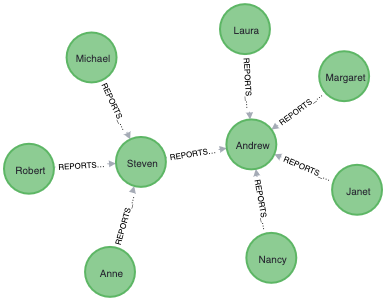

In [25]:

Image(filename = "EmployeesHeirarchy.png")

In [26]:
graph.run('''MATCH (e:Employee)<-[:REPORTS_TO]-(sub)
RETURN e.id AS managerID, e.FirstName AS Manager_Name, sub.id AS EmployeeID, sub.FirstName AS Employee_Name;
''').to_table()

managerID,Manager_Name,EmployeeID,Employee_Name
2,Andrew,8,Laura
2,Andrew,4,Margaret
2,Andrew,1,Nancy
2,Andrew,5,Steven
2,Andrew,3,Janet
5,Steven,9,Anne
5,Steven,7,Robert
5,Steven,6,Michael


#### 2) Find a sample of employees who sold orders and their products

In [27]:

graph.run('''MATCH (e:Employee)-[rel:SOLD]->(o:Order)-[rel2:CONTAINS]->(p:Product)
RETURN e, rel, o, rel2, p LIMIT 25;
''')

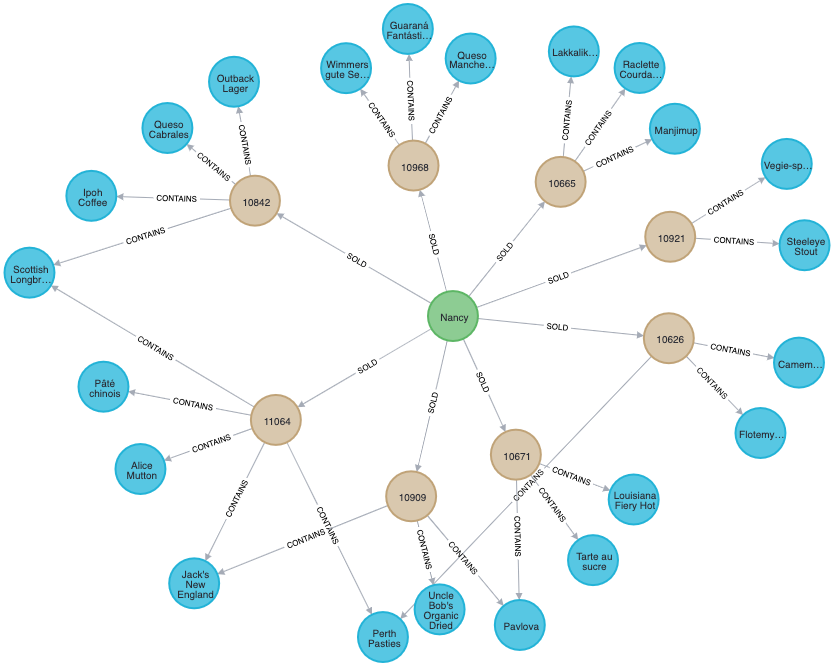

In [28]:
Image(filename = "EmployeeToProduct2.png")

#### 3) Which Employee had the Highest Cross-Selling Count of 'Chocolade' and Another Product?

In [29]:
graph.run('''MATCH (choc:Product {productName:'Chocolade'})<-[:CONTAINS]-(:Order)<-[:SOLD]-(employee),
      (employee)-[:SOLD]->(o2)-[:CONTAINS]->(other:Product)
RETURN employee.employeeID as employee,employee.FirstName as Employee_Name, other.productName as otherProduct, count(distinct o2) as count
ORDER BY count DESC
LIMIT 10;
''').to_table()

employee,Employee_Name,otherProduct,count
4,Margaret,Gnocchi di nonna Alice,14
4,Margaret,Pâté chinois,12
3,Janet,Gumbär Gummibärchen,12
1,Nancy,Flotemysost,12
4,Margaret,Sir Rodney's Scones,11
4,Margaret,Camembert Pierrot,11
1,Nancy,Pavlova,11
1,Nancy,Camembert Pierrot,11
4,Margaret,Boston Crab Meat,11
4,Margaret,Teatime Chocolate Biscuits,11


#### 4) How Many Orders were Made by Each Part of the Hierarchy?

In [30]:
graph.run('''MATCH (e:Employee)
OPTIONAL MATCH (e)<-[:REPORTS_TO*0..]-(sub)-[:SOLD]->(order)
RETURN e.employeeID as ManagerID,e.FirstName as ManagerName, 
[x IN COLLECT(DISTINCT sub.FirstName) WHERE x <> e.FirstName] AS ReportingEmployees,
COUNT(distinct order) AS totalOrders
ORDER BY totalOrders DESC;
''').to_table()

ManagerID,ManagerName,ReportingEmployees,totalOrders
2,Andrew,"['Janet', 'Steven', 'Michael', 'Robert', 'Anne', 'Nancy', 'Margaret', 'Laura']",830
5,Steven,"['Michael', 'Robert', 'Anne']",224
4,Margaret,[],156
3,Janet,[],127
1,Nancy,[],123
8,Laura,[],104
7,Robert,[],72
6,Michael,[],67
9,Anne,[],43
